**DATA CLEANER**

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\Users\tom_v\becode_projects\3_ImmoWeb_scraper\immo-eliza-team6-analysis\data\raw\immo_scraper_merged_test.csv' # Fill your path to file
data_scraped = pd.read_csv(data, sep = ',')

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc
0,20252354,RONSE,9600,319000.0,HOUSE,NaN,3.0,125.0,NaN,FOR_SALE,Rotterij,148,50.744176,3.625722,False,NaN,True,NaN,True,370.0,NaN,4.0,TO_RENOVATE,NaN,NaN,F
1,20251003,GERAARDSBERGEN,9500,299999.0,HOUSE,NaN,3.0,167.0,NaN,FOR_SALE,Pirrestraat,17,50.752121,3.925495,False,NaN,True,NaN,True,895.0,INSTALLED,2.0,GOOD,NaN,NaN,D
2,20247788,Tielt (8700),8700,NaN,HOUSE_GROUP,NaN,NaN,NaN,NaN,FOR_SALE,Kistestraat,13,50.999953,3.322646,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20249506,Deinze,9800,NaN,HOUSE_GROUP,NaN,NaN,NaN,NaN,FOR_SALE,Bremkouter,20-28,50.985489,3.585677,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20247946,Ninove,9400,NaN,HOUSE_GROUP,NaN,NaN,NaN,NaN,FOR_SALE,Geraardsbergsesteenweg,137,50.855284,3.960070,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Print columns names to list
data_scraped.columns.tolist()

['id',
 'locality_name',
 'Postal_code',
 'Price',
 'Subtype',
 'Number_of_rooms',
 'Number_of_bedrooms',
 'Living_area',
 'sale_annuity',
 'Type_of_sale',
 'street',
 'number',
 'latitude',
 'longitude',
 'Open_fire',
 'Swimming_Pool',
 'hasTerrace',
 'terraceSurface',
 'hasGarden',
 'gardenSurface',
 'Kitchen_type',
 'Number_of_facades',
 'State_of_building',
 'Furnished',
 'Starting_price',
 'epc']

In [7]:
# Adding new column
#data_scraped['price_per_sqm'] = data_scraped['Price'] / data_scraped['Living_area']

# Adding new column of price per m2 with safegaurd for ZeroDivisionError
data_scraped['price_per_sqm'] = np.where(data_scraped['Living_area'] == 0, np.nan, data_scraped['Price'] / data_scraped['Living_area'])


In [9]:
# Print columns names to list
data_scraped.columns.tolist()

['id',
 'locality_name',
 'Postal_code',
 'Price',
 'Subtype',
 'Number_of_rooms',
 'Number_of_bedrooms',
 'Living_area',
 'sale_annuity',
 'Type_of_sale',
 'street',
 'number',
 'latitude',
 'longitude',
 'Open_fire',
 'Swimming_Pool',
 'hasTerrace',
 'terraceSurface',
 'hasGarden',
 'gardenSurface',
 'Kitchen_type',
 'Number_of_facades',
 'State_of_building',
 'Furnished',
 'Starting_price',
 'epc',
 'price_per_sqm']

In [10]:
# Edit text in the columns
text_edit_columns = ['Subtype', 'Type_of_sale', 'Kitchen_type', 'State_of_building' ]

for column in text_edit_columns:
    data_scraped[column] = data_scraped[column].astype(str)  # Ensure the column is treated as string
    data_scraped[column] = data_scraped[column].str.replace('_', ' ').str.capitalize() #Replace "_" to space, editing text (first capital letter, rest lower case)

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,RONSE,9600,319000.0,House,NaN,3.0,125.0,NaN,For sale,Rotterij,148,50.744176,3.625722,False,NaN,True,NaN,True,370.0,Nan,4.0,To renovate,NaN,NaN,F,2552.000000
1,20251003,GERAARDSBERGEN,9500,299999.0,House,NaN,3.0,167.0,NaN,For sale,Pirrestraat,17,50.752121,3.925495,False,NaN,True,NaN,True,895.0,Installed,2.0,Good,NaN,NaN,D,1796.401198
2,20247788,Tielt (8700),8700,NaN,House group,NaN,NaN,NaN,NaN,For sale,Kistestraat,13,50.999953,3.322646,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN
3,20249506,Deinze,9800,NaN,House group,NaN,NaN,NaN,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN
4,20247946,Ninove,9400,NaN,House group,NaN,NaN,NaN,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN


In [11]:
#Edit text of cities and street names
names_edit_columns = ['locality_name', 'street']

for column in names_edit_columns:
    data_scraped[column] = data_scraped[column].astype(str)  # Ensure the column is treated as string
    data_scraped[column] = data_scraped[column].str.title() #Editing text (first scapital letters, rest lower case)

# Remove zip code from brackets, e.g. "Tielt (8700)" -> "Tielt"

data_scraped['locality_name'] = data_scraped['locality_name'].str.replace(r"\s*\(\d+\)", "", regex=True)

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000.0,House,NaN,3.0,125.0,NaN,For sale,Rotterij,148,50.744176,3.625722,False,NaN,True,NaN,True,370.0,Nan,4.0,To renovate,NaN,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999.0,House,NaN,3.0,167.0,NaN,For sale,Pirrestraat,17,50.752121,3.925495,False,NaN,True,NaN,True,895.0,Installed,2.0,Good,NaN,NaN,D,1796.401198
2,20247788,Tielt,8700,NaN,House group,NaN,NaN,NaN,NaN,For sale,Kistestraat,13,50.999953,3.322646,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN
3,20249506,Deinze,9800,NaN,House group,NaN,NaN,NaN,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN
4,20247946,Ninove,9400,NaN,House group,NaN,NaN,NaN,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,False,NaN,NaN,NaN,NaN,NaN,Nan,NaN,Nan,NaN,NaN,NaN,NaN


In [12]:
# Edit the numbers in columns

# Selecting the columns to change
number_edit_columns = ['Number_of_bedrooms', 'Living_area', 'Number_of_facades', 'Price']

# Converting the cell value to int (so that they are integers), if there is no value in the cell - fill in 0.
for column in number_edit_columns:
    data_scraped[column] = pd.to_numeric(data_scraped[column], errors='coerce').fillna(0).astype('Int64')

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,False,NaN,True,NaN,True,370.0,Nan,4,To renovate,NaN,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,False,NaN,True,NaN,True,895.0,Installed,2,Good,NaN,NaN,D,1796.401198
2,20247788,Tielt,8700,0,House group,NaN,0,0,NaN,For sale,Kistestraat,13,50.999953,3.322646,False,NaN,NaN,NaN,NaN,NaN,Nan,0,Nan,NaN,NaN,NaN,NaN
3,20249506,Deinze,9800,0,House group,NaN,0,0,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,False,NaN,NaN,NaN,NaN,NaN,Nan,0,Nan,NaN,NaN,NaN,NaN
4,20247946,Ninove,9400,0,House group,NaN,0,0,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,False,NaN,NaN,NaN,NaN,NaN,Nan,0,Nan,NaN,NaN,NaN,NaN


In [13]:
# Replace 'True', 'False' and empty cells value on binary values

columns_for_change_01 = ['Open_fire', 'Swimming_Pool', 'Furnished', 'hasTerrace'] #Columns for change

# Values conversion cells from false to 0, true to 1, if empty fill as 0.
data_scraped[columns_for_change_01] = data_scraped[columns_for_change_01].replace({False:0, True:1}).fillna(0).astype('Int64')

# Display first 5 rows
data_scraped.head()

C:\Users\tom_v\AppData\Local\Temp\ipykernel_27096\1979093822.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_scraped[columns_for_change_01] = data_scraped[columns_for_change_01].replace({False:0, True:1}).fillna(0).astype('Int64')


,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,0,0,1,NaN,True,370.0,Nan,4,To renovate,0,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,0,0,1,NaN,True,895.0,Installed,2,Good,0,NaN,D,1796.401198
2,20247788,Tielt,8700,0,House group,NaN,0,0,NaN,For sale,Kistestraat,13,50.999953,3.322646,0,0,0,NaN,NaN,NaN,Nan,0,Nan,0,NaN,NaN,NaN
3,20249506,Deinze,9800,0,House group,NaN,0,0,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,0,0,0,NaN,NaN,NaN,Nan,0,Nan,0,NaN,NaN,NaN
4,20247946,Ninove,9400,0,House group,NaN,0,0,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,0,0,0,NaN,NaN,NaN,Nan,0,Nan,0,NaN,NaN,NaN


In [14]:
# Edit area's cells

# Columns for change
columns_for_change_m2 = ['Living_area', 'terraceSurface', 'gardenSurface']

# Change string value to an integer
for col in columns_for_change_m2:
    data_scraped[col] = pd.to_numeric(data_scraped[col], errors='coerce').fillna(0).astype('Int64')

#Add m² to the area values
#for col in columns_for_change_m2:
#    data_scraped[col] = data_scraped[col].apply(lambda x: f"{x} m²" if pd.notna(x) and x != 0 else x) 

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,0,0,1,0,True,370,Nan,4,To renovate,0,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,0,0,1,0,True,895,Installed,2,Good,0,NaN,D,1796.401198
2,20247788,Tielt,8700,0,House group,NaN,0,0,NaN,For sale,Kistestraat,13,50.999953,3.322646,0,0,0,0,NaN,0,Nan,0,Nan,0,NaN,NaN,NaN
3,20249506,Deinze,9800,0,House group,NaN,0,0,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,0,0,0,0,NaN,0,Nan,0,Nan,0,NaN,NaN,NaN
4,20247946,Ninove,9400,0,House group,NaN,0,0,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,0,0,0,0,NaN,0,Nan,0,Nan,0,NaN,NaN,NaN


In [15]:
# Replace "0" and "Nan" on "Null"

# Columns for change
columns_for_change_null = ['hasGarden', 'epc', 'Kitchen_type', 'State_of_building']

# Reaplace 0 and Nan on 'null'
data_scraped[columns_for_change_null] = data_scraped[columns_for_change_null].replace({0: 'null', 'Nan': 'null'})

# Empty cells fill as 'null'
data_scraped[columns_for_change_null] = data_scraped[columns_for_change_null].fillna('null')

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,0,0,1,0,True,370,null,4,To renovate,0,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,0,0,1,0,True,895,Installed,2,Good,0,NaN,D,1796.401198
2,20247788,Tielt,8700,0,House group,NaN,0,0,NaN,For sale,Kistestraat,13,50.999953,3.322646,0,0,0,0,null,0,null,0,null,0,NaN,null,NaN
3,20249506,Deinze,9800,0,House group,NaN,0,0,NaN,For sale,Bremkouter,20-28,50.985489,3.585677,0,0,0,0,null,0,null,0,null,0,NaN,null,NaN
4,20247946,Ninove,9400,0,House group,NaN,0,0,NaN,For sale,Geraardsbergsesteenweg,137,50.855284,3.960070,0,0,0,0,null,0,null,0,null,0,NaN,null,NaN


In [16]:
# Checking how many rows there are in a data frame
data_scraped.shape[0]

9989

In [17]:
# Remove lines where 'Starting_price' is True
data_scraped = data_scraped[data_scraped['Starting_price'] != True]

# Remove lines where 'Price' is = 0
data_scraped = data_scraped[data_scraped['Price'] != 0]

# Remove lines where 'Living area' is = 0
data_scraped = data_scraped[data_scraped['Living_area'] != 0]

# Remove lines where 'Number_of_bedrooms' is = 0
data_scraped = data_scraped[data_scraped['Number_of_bedrooms'] != 0]


# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,0,0,1,0,True,370,null,4,To renovate,0,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,0,0,1,0,True,895,Installed,2,Good,0,NaN,D,1796.401198
8,20252002,Mechelen,2800,275000,House,NaN,3,154,NaN,For sale,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,True,20,Semi equipped,2,To renovate,0,NaN,E,1785.714286
9,20252352,Gooik,1755,295000,House,NaN,3,172,NaN,For sale,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,True,300,null,3,To renovate,0,NaN,F,1715.116279
18,20250577,Sint-Katelijne-Waver,2860,345000,Apartment block,NaN,1,43,NaN,For sale,Ijzerenveld,4,51.034950,4.511372,0,0,1,4,null,0,null,2,Good,0,NaN,B,8023.255814


In [18]:
# Checking how many rows there are in a data frame after remove
data_scraped.shape[0]

8328

In [19]:
#Checks values in column
data_scraped['Subtype'].value_counts()

Subtype
House                   6153
Villa                    946
Mixed use building       304
Apartment block          232
Mansion                  171
Exceptional property     171
Town house               104
Bungalow                  88
Country cottage           85
Farmhouse                 41
Chalet                    13
Manor house               10
Castle                     8
Other property             2
Name: count, dtype: int64

These property types—'House group', 'Mixed use building', 'Apartment block', 'Castle', 'Other property', 'Exceptional property'—are not used our my analysis of housing and apartment prices because they represent categories that are either too broad, non-residential, or highly specialized. Including them would introduce significant variability and outliers, making it difficult to accurately assess market trends for standard residential properties like single-family homes or apartments. My analysis focuses on more typical housing types to ensure relevance and consistency in the data.

In [20]:
# Cleaning data from unnecessary subtypes

values_to_remove = ['House group','Mixed use building', 'Apartment block', 'Castle', 'Other property', 'Exceptional property']
data_scraped = data_scraped[~data_scraped['Subtype'].isin(values_to_remove)]

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_rooms,Number_of_bedrooms,Living_area,sale_annuity,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,hasGarden,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,Starting_price,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,NaN,3,125,NaN,For sale,Rotterij,148,50.744176,3.625722,0,0,1,0,True,370,null,4,To renovate,0,NaN,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,NaN,3,167,NaN,For sale,Pirrestraat,17,50.752121,3.925495,0,0,1,0,True,895,Installed,2,Good,0,NaN,D,1796.401198
8,20252002,Mechelen,2800,275000,House,NaN,3,154,NaN,For sale,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,True,20,Semi equipped,2,To renovate,0,NaN,E,1785.714286
9,20252352,Gooik,1755,295000,House,NaN,3,172,NaN,For sale,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,True,300,null,3,To renovate,0,NaN,F,1715.116279
20,20250985,Oetingen,1755,560000,House,NaN,4,350,NaN,For sale,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,True,32,Installed,3,Good,0,NaN,C,1600.000000


In [21]:
#Checks values in column after cleaning
data_scraped['Subtype'].value_counts()

Subtype
House              6153
Villa               946
Mansion             171
Town house          104
Bungalow             88
Country cottage      85
Farmhouse            41
Chalet               13
Manor house          10
Name: count, dtype: int64

In [22]:
# Checking how many rows there are in a data frame after second remove
data_scraped.shape[0]

7611

In [23]:
# Checking how many columns there are in a data frame
data_scraped.shape[1]

27

In [24]:
# Removing unnecessary columns

columns_to_drop = ['Number_of_rooms', 'sale_annuity', 'Starting_price', 'Type_of_sale', 'hasGarden']
data_scraped = data_scraped.drop(columns=columns_to_drop, errors='ignore')

# Display first 5 rows
data_scraped.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,null,4,To renovate,0,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1796.401198
8,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,1785.714286
9,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,null,3,To renovate,0,F,1715.116279
20,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,1600.000000


In [25]:
# Checking how many columns there are in a data frame after remove
data_scraped.shape[1]

22

**CLEANING DATA FROM DUPLICATES**

In [26]:
# Check which rows are duplicates (indicates True for duplicates)

cleaned_data = data_scraped.drop_duplicates(subset=['latitude', 'longitude', 'street', 'number', 'Subtype'])
duplicates = data_scraped[data_scraped.duplicated(subset=['latitude', 'longitude', 'street', 'number', 'Subtype'])]

print(duplicates)

            id       locality_name Postal_code    Price Subtype  \
38    20236560          Borgerhout        2140   389900   House   
42    20249528               Ronse        9600   325500   House   
119   20251655           Rochefort        5580   149000   House   
121   20251399          Oudenaarde        9700   165000   House   
122   20251655           Rochefort        5580   149000   House   
...        ...                 ...         ...      ...     ...   
9951  20220161         Châtelineau        6200    85000   House   
9952  20220329              Astene        9800   420000   House   
9965  20231733  Rhode-Saint-Genese        1640  3495000   House   
9979  20142785          Londerzeel        1840   285000   House   
9980  20204784            Overijse        3090   290000   House   

      Number_of_bedrooms  Living_area            street number   latitude  \
38                     3          150       Kroonstraat    134  51.212485   
42                     3          122    

In [27]:
# Checking how many rows there are in a data frame after removing duplicates
cleaned_data.shape[0]

6946

**SAVING DATA TO NEW FILE**

In [28]:
# Save data to new csv file**SAVING DATA TO NEW FILE**

cleaned_data.to_csv('cleaned_data_incl_outliers.csv', index=False)
print("The CSV file was saved as 'cleaned_data_incl_outliers.csv'.")

# Display first 5 rows
cleaned_data.head()

The CSV file was saved as 'cleaned_data_incl_outliers.csv'.


,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,null,4,To renovate,0,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1796.401198
8,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,1785.714286
9,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,null,3,To renovate,0,F,1715.116279
20,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,1600.000000


**CLEANING DATA FROM OUTLINERS**

**Z-score method**

<Axes: xlabel='Number_of_bedrooms'>

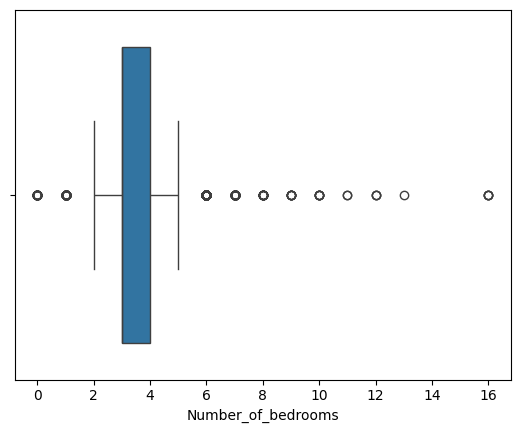

In [485]:
# to see outliners from Number_of_bedrooms in boxplot

sns.boxplot(x=cleaned_data_without_outliers['Number_of_bedrooms'], orient='h')

In [29]:
upper_limit = cleaned_data['Number_of_bedrooms'].mean() + 4*cleaned_data['Number_of_bedrooms'].std()

lower_limit = cleaned_data['Number_of_bedrooms'].mean() - 4*cleaned_data['Number_of_bedrooms'].std()

print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 8.695551361957364
lower limit: -1.5115605758934412


In [30]:
# find the ouliner

cleaned_data.loc[(cleaned_data['Number_of_bedrooms'] > upper_limit) | (cleaned_data['Number_of_bedrooms'] < lower_limit)]

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm
323,20240646,Woluwe-Saint-Lambert,1200,790000,House,10,362,Avenue De Juillet,44,50.847921,4.414961,0,0,1,5,50,Hyper equipped,2,To renovate,0,G,2182.320442
877,20246583,Grez-Doiceau,1390,649000,House,10,407,Petite Rue Des Prés,6,50.738804,4.661776,0,0,1,10,0,Installed,4,To renovate,0,D,1594.594595
2426,20246971,Gent,9000,649000,Mansion,10,319,Wijngaardstraat,18,51.048431,3.718139,0,0,0,0,126,null,2,To renovate,0,D,2034.482759
3195,20150570,Ieper,8900,719000,House,12,559,Colaertplein,5,50.849124,2.877171,0,0,0,0,340,null,2,To renovate,0,F,1286.225403
4903,20152610,Wavre,1300,695000,House,9,420,Avenue Montesquieu,25,50.714741,4.634883,0,0,1,0,0,Installed,4,Good,0,C,1654.761905
4916,20141889,Corroy-Le-Grand,1325,1395000,Villa,10,510,Rue Du Warichet,12,50.666398,4.671964,0,0,1,64,3752,Hyper equipped,4,As new,0,D,2735.294118
5044,20133161,Ronse,9600,449000,Mansion,16,1350,Olifantstraat,24-26,50.745185,3.605262,0,0,1,0,0,Semi equipped,2,To renovate,0,E,332.592593
5094,20122032,Herent,3020,825000,Mansion,11,669,Wilselsesteenweg,9,50.905929,4.674694,0,0,1,0,0,Installed,2,To be done up,0,F,1233.183857
5713,20191677,Menen,8930,650000,Mansion,9,683,Ieperstraat,102,50.797566,3.114622,0,0,0,0,0,null,0,Good,0,B,951.683748
5983,20099588,Gent,9000,1150000,House,15,950,Geldmunt,22,51.057414,3.721374,0,0,0,0,23,Installed,3,To restore,0,F,1210.526316


In [32]:
# remove outliers

cleaned_data_without_outliers = cleaned_data.loc[(cleaned_data['Number_of_bedrooms'] < upper_limit) & (cleaned_data['Number_of_bedrooms'] > lower_limit)]
print('befor removing outliers:', len(cleaned_data))
print('after removing outliers:', len(cleaned_data_without_outliers))
print('outliers:', len(cleaned_data) - len(cleaned_data_without_outliers))

befor removing outliers: 6946
after removing outliers: 6911
outliers: 35


<Axes: xlabel='Number_of_bedrooms'>

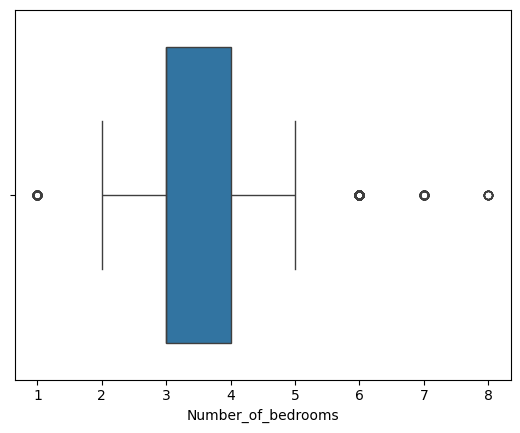

In [39]:
# to see outliners from Number_of_bedrooms in boxplot

sns.boxplot(x=cleaned_data_without_outliers['Number_of_bedrooms'], orient='h')

In [34]:
cleaned_data_without_outliers['Number_of_bedrooms'].agg(['count','skew','mean','median'])

count     6911.000000
skew         0.817543
mean         3.550427
median       3.000000
Name: Number_of_bedrooms, dtype: float64

<Axes: xlabel='Living_area'>

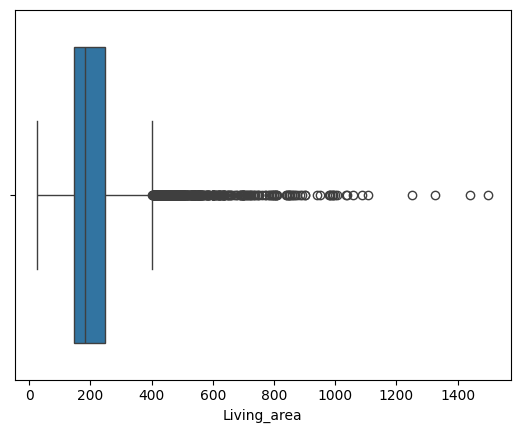

In [35]:
# to see outliners from Living area in boxplot

sns.boxplot(x=cleaned_data_without_outliers['Living_area'], orient='h')

count     6281.000000
skew         0.590661
mean       186.540837
median     175.000000
Name: Living_area, dtype: float64

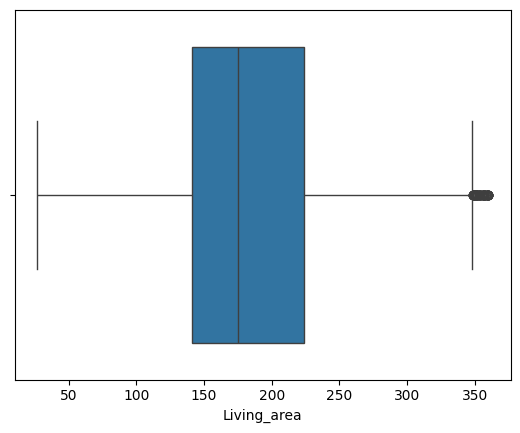

In [40]:
# Outliers by 'Living area' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = cleaned_data_without_outliers['Living_area'].quantile(0.25)
q3 = cleaned_data_without_outliers['Living_area'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliners
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
cleaned_data_without_outliers = cleaned_data_without_outliers[(cleaned_data_without_outliers['Living_area'] >= lower_bound) & 
                            (cleaned_data_without_outliers['Living_area'] <= upper_bound)]

# Display first 5 rows
cleaned_data_without_outliers['Living_area'].value_counts

sns.boxplot(x=cleaned_data_without_outliers['Living_area'], orient='h')
cleaned_data_without_outliers['Living_area'].agg(['count','skew','mean','median'])

<Axes: xlabel='Price'>

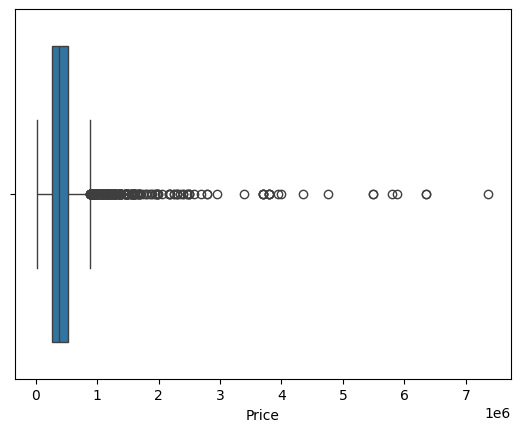

In [42]:
# to see outliners from Price in boxplot

sns.boxplot(x=cleaned_data_without_outliers['Price'], orient='h')

count       5937.000000
skew           0.689035
mean      389860.365336
median    369000.000000
Name: Price, dtype: float64

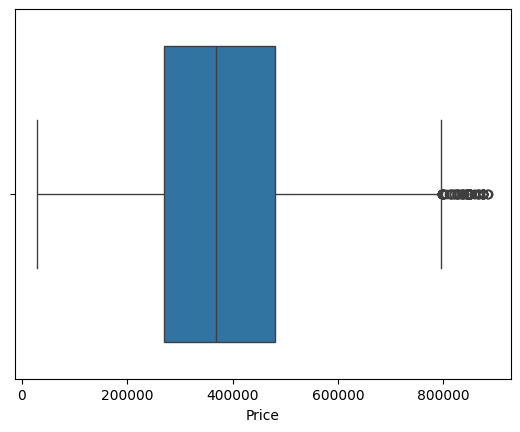

In [43]:
# Outliers by 'Price' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = cleaned_data_without_outliers['Price'].quantile(0.25)
q3 = cleaned_data_without_outliers['Price'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliners
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
cleaned_data_without_outliers = cleaned_data_without_outliers[(cleaned_data_without_outliers['Price'] >= lower_bound) & 
                            (cleaned_data_without_outliers['Price'] <= upper_bound)]



sns.boxplot(x=cleaned_data_without_outliers['Price'], orient='h')
cleaned_data_without_outliers['Price'].agg(['count','skew','mean','median'])



<Axes: xlabel='price_per_sqm'>

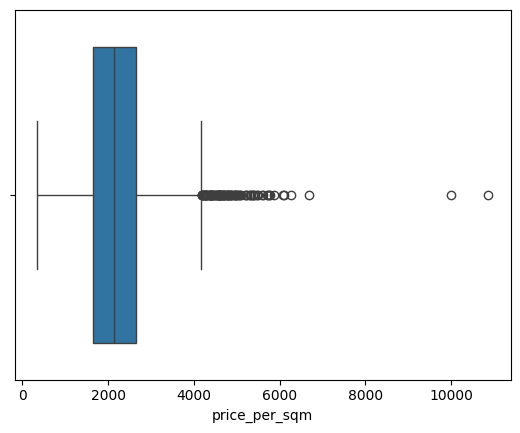

In [44]:
# to see outliners from Price in boxplot

sns.boxplot(x=cleaned_data_without_outliers['price_per_sqm'], orient='h')

count     5937.000000
skew         1.118979
mean      2210.643074
median    2138.392857
Name: price_per_sqm, dtype: float64

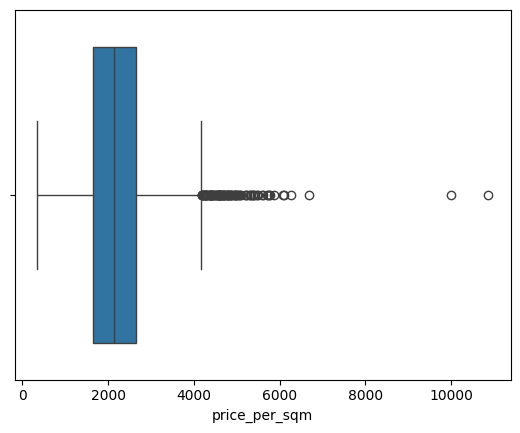

In [45]:
# Outliers by 'Price' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

q1 = cleaned_data_without_outliers['price_per_sqm'].quantile(0.25)
q3 = cleaned_data_without_outliers['price_per_sqm'].quantile(0.75)
iqr = q3 - q1

# Specifying the scope of outliners
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Data filtering
clened_data_without_outliers = cleaned_data_without_outliers[(cleaned_data_without_outliers['price_per_sqm'] >= lower_bound) & 
                            (cleaned_data_without_outliers['price_per_sqm'] <= upper_bound)]



sns.boxplot(x=cleaned_data_without_outliers['price_per_sqm'], orient='h')
cleaned_data_without_outliers['price_per_sqm'].agg(['count','skew','mean','median'])



In [46]:
# to see outliners from terrace surface in boxplot

#sns.boxplot(x=clened_data_without_bedrooms_outliers['terraceSurface'], orient='h')

In [47]:
# Outliers by 'teracce surface' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

#q1 = clened_data_without_bedrooms_outliers['terraceSurface'].quantile(0.25)
#q3 = clened_data_without_bedrooms_outliers['terraceSurface'].quantile(0.75)
#iqr = q3 - q1

# Specifying the scope of outliners
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Data filtering
#clened_data_without_bedrooms_outliers = clened_data_without_bedrooms_outliers[(clened_data_without_bedrooms_outliers['terraceSurface'] >= lower_bound) & 
#                            (clened_data_without_bedrooms_outliers['terraceSurface'] <= upper_bound)]



#sns.boxplot(x=clened_data_without_bedrooms_outliers['terraceSurface'], orient='h')
#clened_data_without_bedrooms_outliers['terraceSurface'].agg(['count','skew','mean','median'])



**SAVING DATA TO NEW FILE**

In [49]:
# Save data to new csv file

cleaned_data_without_outliers.to_csv('cleaned_data_excl_outliers.csv', index=False)
print("The CSV file was saved as cleaned_data_excl_outliers.csv.")

# Display first 5 rows
cleaned_data_without_outliers.head()

The CSV file was saved as cleaned_data_excl_outliers.csv.


,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,null,4,To renovate,0,F,2552.000000
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1796.401198
8,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,1785.714286
9,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,null,3,To renovate,0,F,1715.116279
20,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,1600.000000


In [498]:
cleaned_data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5828 entries, 0 to 9988
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5828 non-null   int64  
 1   locality_name       5828 non-null   object 
 2   Postal_code         5828 non-null   object 
 3   Price               5828 non-null   Int64  
 4   Subtype             5828 non-null   object 
 5   Number_of_bedrooms  5828 non-null   Int64  
 6   Living_area         5828 non-null   Int64  
 7   street              5828 non-null   object 
 8   number              5807 non-null   object 
 9   latitude            5823 non-null   float64
 10  longitude           5823 non-null   float64
 11  Open_fire           5828 non-null   Int64  
 12  Swimming_Pool       5828 non-null   Int64  
 13  hasTerrace          5828 non-null   Int64  
 14  terraceSurface      5828 non-null   Int64  
 15  gardenSurface       5828 non-null   Int64  
 16  Kitchen_typ